# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Base de dados

In [ ]:
iris = "https://raw.githubusercontent.com/hiramaralIA/Repositorio_M_Entregas_Python/main/Marcelo%20Bilby/MINI%20PROJETO%20IRIS/Base%20de%20dados/Iris_figura_excel%20-%20Data.csv"
base_iris = pd.read_csv(iris)
base_iris

,index,Species_No,Petal_width,Petal_length,Sepal_width,Sepal_length,class
0,1,1,"0,2","1,4","3,5","5,1",Setosa
1,1,1,"0,2","1,4",3,"4,9",Setosa
2,1,1,"0,2","1,3","3,2","4,7",Setosa
3,1,1,"0,2","1,5","3,1","4,6",Setosa
4,1,1,"0,2","1,4","3,6",5,Setosa
...,...,...,...,...,...,...,...
145,3,3,"2,3","5,2",3,"6,7",Verginica
146,3,3,"1,9",5,"2,5","6,3",Verginica
147,3,3,2,"5,2",3,"6,5",Verginica
148,3,3,"2,3","5,4","3,4","6,2",Verginica


#Alterando os valores da base de ", " para "."

# Petal Width

In [ ]:
for linha in base_iris['Petal_width']:
  modificador = linha.replace(',', '.')
  base_iris.loc[base_iris['Petal_width'] == linha, 'Petal_width'] = modificador

# Petal Length

In [ ]:
for linha in base_iris['Petal_length']:
  modificador = linha.replace(',', '.')
  base_iris.loc[base_iris['Petal_length'] == linha, 'Petal_length'] = modificador

# Sepal Width


In [ ]:
for linha in base_iris['Sepal_width']:
  modificador = linha.replace(',', '.')
  base_iris.loc[base_iris['Sepal_width'] == linha, 'Sepal_width'] = modificador

# Sepal Length

In [ ]:
for linha in base_iris['Sepal_length']:
  modificador = linha.replace(',', '.')
  base_iris.loc[base_iris['Sepal_length'] == linha, 'Sepal_length'] = modificador

In [ ]:
base_iris

,index,Species_No,Petal_width,Petal_length,Sepal_width,Sepal_length,class
0,1,1,0.2,1.4,3.5,5.1,Setosa
1,1,1,0.2,1.4,3,4.9,Setosa
2,1,1,0.2,1.3,3.2,4.7,Setosa
3,1,1,0.2,1.5,3.1,4.6,Setosa
4,1,1,0.2,1.4,3.6,5,Setosa
...,...,...,...,...,...,...,...
145,3,3,2.3,5.2,3,6.7,Verginica
146,3,3,1.9,5,2.5,6.3,Verginica
147,3,3,2,5.2,3,6.5,Verginica
148,3,3,2.3,5.4,3.4,6.2,Verginica


# Tamanho da Base de Dados

In [ ]:
print(base_iris.shape)

(150, 7)


# 2 Primeiros elementos

In [ ]:
base_iris.head(2)

,index,Species_No,Petal_width,Petal_length,Sepal_width,Sepal_length,class
0,1,1,0.2,1.4,3.5,5.1,Setosa
1,1,1,0.2,1.4,3,4.9,Setosa


# 2 Ultimos Elementos

In [ ]:
base_iris.tail(2)

,index,Species_No,Petal_width,Petal_length,Sepal_width,Sepal_length,class
148,3,3,2.3,5.4,3.4,6.2,Verginica
149,3,3,1.8,5.1,3,5.9,Verginica


# Descrição da base iris

In [ ]:
base_iris.describe()

,index,Species_No
count,150.000000,150.000000
mean,2.000000,2.000000
std,0.819232,0.819232
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,3.000000,3.000000


# Classificação por grupo

In [ ]:
base_iris.groupby('class').size()

class
 Setosa        50
 Verginica     50
 Versicolor    50
dtype: int64

In [41]:
base_iris.isnull().sum()

index           0
Species_No      0
Petal_width     0
Petal_length    0
Sepal_width     0
Sepal_length    0
class           0
dtype: int64

In [42]:
base_iris.isna().sum()

index           0
Species_No      0
Petal_width     0
Petal_length    0
Sepal_width     0
Sepal_length    0
class           0
dtype: int64

# Grafico de classificação

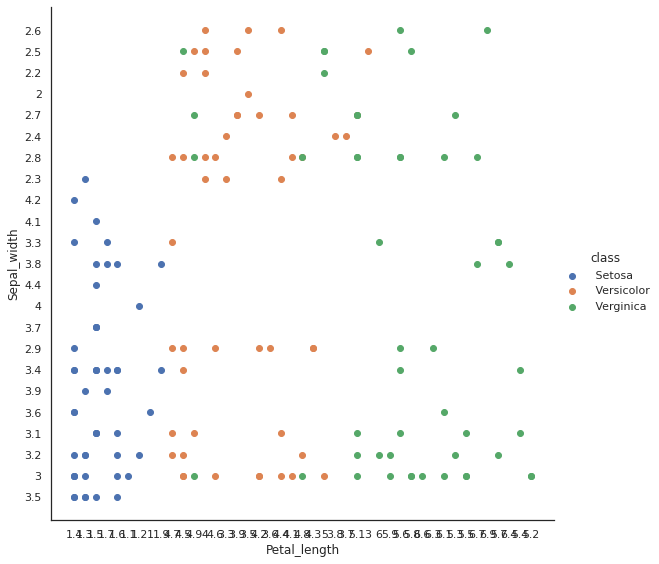

In [ ]:
sns.set(style = 'white', color_codes = True)
sns.FacetGrid(base_iris, hue='class', height=8).map(plt.scatter, 'Petal_length', 'Sepal_width').add_legend()

# Separando colunas

In [ ]:
previsores = base_iris.iloc[:, 2:6]
classe = base_iris.iloc[:, 6]

In [ ]:
previsores

,Petal_width,Petal_length,Sepal_width,Sepal_length
0,0.2,1.4,3.5,5.1
1,0.2,1.4,3,4.9
2,0.2,1.3,3.2,4.7
3,0.2,1.5,3.1,4.6
4,0.2,1.4,3.6,5
...,...,...,...,...
145,2.3,5.2,3,6.7
146,1.9,5,2.5,6.3
147,2,5.2,3,6.5
148,2.3,5.4,3.4,6.2


In [ ]:
classe

0          Setosa
1          Setosa
2          Setosa
3          Setosa
4          Setosa
          ...    
145     Verginica
146     Verginica
147     Verginica
148     Verginica
149     Verginica
Name: class, Length: 150, dtype: object

# Divisão entre previsores de class

In [ ]:
previsores.columns

Index(['Petal_width', 'Petal_length', 'Sepal_width', 'Sepal_length'], dtype='object')

In [ ]:
x_previsores = previsores.values
y_classe = classe.values

In [ ]:
x_previsores

array([['0.2', '1.4', '3.5', '5.1'],
       ['0.2', '1.4', '3', '4.9'],
       ['0.2', '1.3', '3.2', '4.7'],
       ['0.2', '1.5', '3.1', '4.6'],
       ['0.2', '1.4', '3.6', '5'],
       ['0.4', '1.7', '3.9', '5.4'],
       ['0.3', '1.4', '3.4', '4.6'],
       ['0.2', '1.5', '3.4', '5'],
       ['0.2', '1.4', '2.9', '4.4'],
       ['0.1', '1.5', '3.1', '4.9'],
       ['0.2', '1.5', '3.7', '5.4'],
       ['0.2', '1.6', '3.4', '4.8'],
       ['0.1', '1.4', '3', '4.8'],
       ['0.1', '1.1', '3', '4.3'],
       ['0.2', '1.2', '4', '5.8'],
       ['0.4', '1.5', '4.4', '5.7'],
       ['0.4', '1.3', '3.9', '5.4'],
       ['0.3', '1.4', '3.5', '5.1'],
       ['0.3', '1.7', '3.8', '5.7'],
       ['0.3', '1.5', '3.8', '5.1'],
       ['0.2', '1.7', '3.4', '5.4'],
       ['0.4', '1.5', '3.7', '5.1'],
       ['0.2', '1', '3.6', '4.6'],
       ['0.5', '1.7', '3.3', '5.1'],
       ['0.2', '1.9', '3.4', '4.8'],
       ['0.2', '1.6', '3', '5'],
       ['0.4', '1.6', '3.4', '5'],
       ['0.2', '1.5',

In [ ]:
x_previsores[0]

array(['0.2', '1.4', '3.5', '5.1'], dtype=object)

In [ ]:
y_classe

array([' Setosa', ' Setosa', ' Setosa', ' Setosa', ' Setosa', ' Setosa',
       ' Setosa', ' Setosa', ' Setosa', ' Setosa', ' Setosa', ' Setosa',
       ' Setosa', ' Setosa', ' Setosa', ' Setosa', ' Setosa', ' Setosa',
       ' Setosa', ' Setosa', ' Setosa', ' Setosa', ' Setosa', ' Setosa',
       ' Setosa', ' Setosa', ' Setosa', ' Setosa', ' Setosa', ' Setosa',
       ' Setosa', ' Setosa', ' Setosa', ' Setosa', ' Setosa', ' Setosa',
       ' Setosa', ' Setosa', ' Setosa', ' Setosa', ' Setosa', ' Setosa',
       ' Setosa', ' Setosa', ' Setosa', ' Setosa', ' Setosa', ' Setosa',
       ' Setosa', ' Setosa', ' Versicolor', ' Versicolor', ' Versicolor',
       ' Versicolor', ' Versicolor', ' Versicolor', ' Versicolor',
       ' Versicolor', ' Versicolor', ' Versicolor', ' Versicolor',
       ' Versicolor', ' Versicolor', ' Versicolor', ' Versicolor',
       ' Versicolor', ' Versicolor', ' Versicolor', ' Versicolor',
       ' Versicolor', ' Versicolor', ' Versicolor', ' Versicolor',
       

# Treinamento

In [50]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_previsores, y_classe, test_size = 0.3, random_state = 42)

In [51]:
modelo = GaussianNB()
modelo.fit(x_treino, y_treino)

GaussianNB()

In [62]:
treino_teste_y = modelo.predict(x_treino)
matriz = confusion_matrix(y_treino, treino_teste_y)
treino_teste_y

array([' Versicolor', ' Versicolor', ' Verginica', ' Versicolor',
       ' Verginica', ' Versicolor', ' Verginica', ' Versicolor',
       ' Setosa', ' Verginica', ' Versicolor', ' Setosa', ' Setosa',
       ' Setosa', ' Versicolor', ' Verginica', ' Setosa', ' Setosa',
       ' Setosa', ' Versicolor', ' Setosa', ' Versicolor', ' Verginica',
       ' Setosa', ' Versicolor', ' Verginica', ' Setosa', ' Verginica',
       ' Verginica', ' Versicolor', ' Versicolor', ' Verginica',
       ' Versicolor', ' Setosa', ' Versicolor', ' Verginica', ' Setosa',
       ' Setosa', ' Versicolor', ' Verginica', ' Setosa', ' Verginica',
       ' Setosa', ' Setosa', ' Verginica', ' Versicolor', ' Verginica',
       ' Versicolor', ' Verginica', ' Verginica', ' Versicolor',
       ' Setosa', ' Setosa', ' Versicolor', ' Verginica', ' Setosa',
       ' Setosa', ' Setosa', ' Versicolor', ' Verginica', ' Setosa',
       ' Verginica', ' Verginica', ' Setosa', ' Versicolor',
       ' Versicolor', ' Verginica', ' Ve

In [61]:
y_treino.shape

(105,)

# Apresentação dos resultados

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        31
   Verginica       0.92      0.92      0.92        37
  Versicolor       0.92      0.92      0.92        37

    accuracy                           0.94       105
   macro avg       0.95      0.95      0.95       105
weighted avg       0.94      0.94      0.94       105



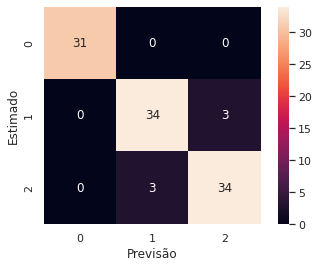

In [63]:
sns.heatmap(matriz.T, square=True, annot=True)
plt.xlabel('Previsão');
plt.ylabel('Estimado');

print(classification_report(y_treino, treino_teste_y)) 

# PREVISÃO

In [64]:
def verifique(digito):
  valor = 0
  ehnumero = False

  while ehnumero == False:
    
      teste = str(input(digito))
      if teste.replace(".", "").isdigit():
        valor = float(teste)
        ehnumero = True
      else:
        print("\033[0;31m ERROR!! Digite um número válido: \033[m")
        ehnumero = False
        continue
      return valor
      


larg_petala = verifique("Digite a largura da Pétala: ")
alt_petala = verifique("Digite a altura da Pétala: ")
larg_sepala = verifique("Digite a largura da Sépala: ")
alt_sepala = verifique("Digite a altura da Sépala: ")

    

Digite a largura da Pétala: 1.5
Digite a altura da Pétala: 2.4
Digite a largura da Sépala: 3.3
Digite a altura da Sépala: 5.1


In [65]:
previsao =  modelo.predict([[larg_petala, alt_petala, larg_sepala, alt_sepala]])
print(previsao)

[' Versicolor']
